# M5 - W2 Assignment: Getting serious about Data Visualisation

## 1. Working with the IRIS dataset


In [3]:
#necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
#load the iris dataset
iris = pd.read_csv('/Users/apple/Desktop/amsterdam_tech/m5w2/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


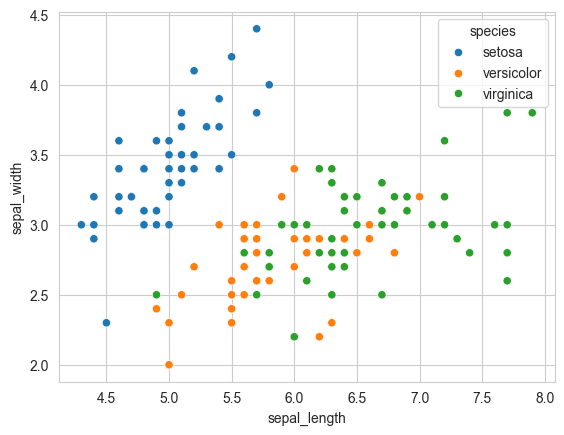

In [5]:
#make a scatterplot
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris,hue='species')
plt.show()

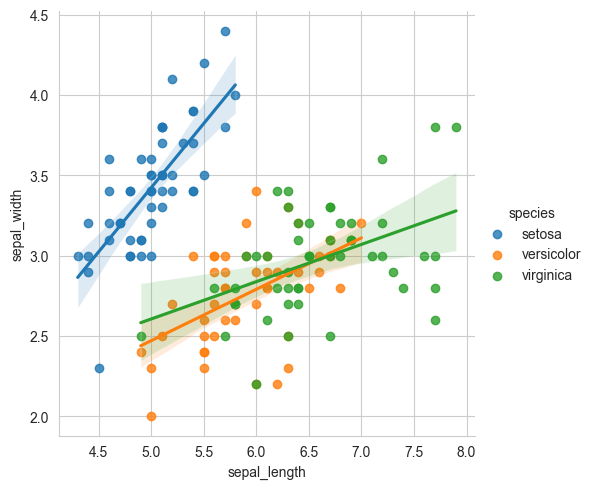

In [6]:
# One overall regardless of groups
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
plt.show()


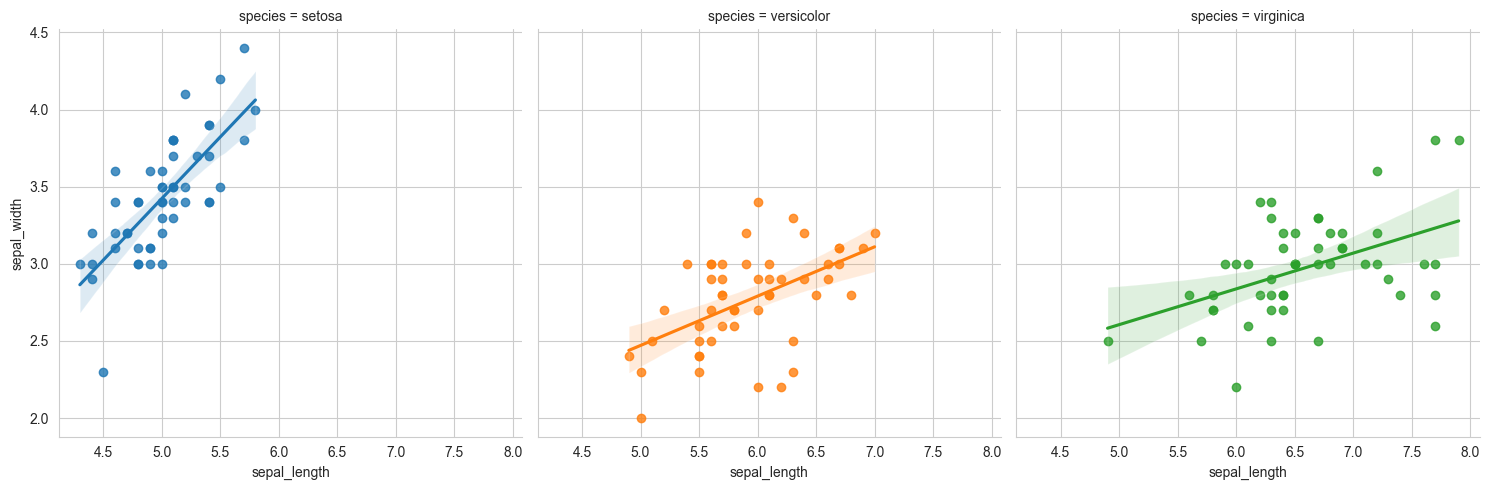

In [36]:
#One for each group separately

sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species', col='species')
plt.show()

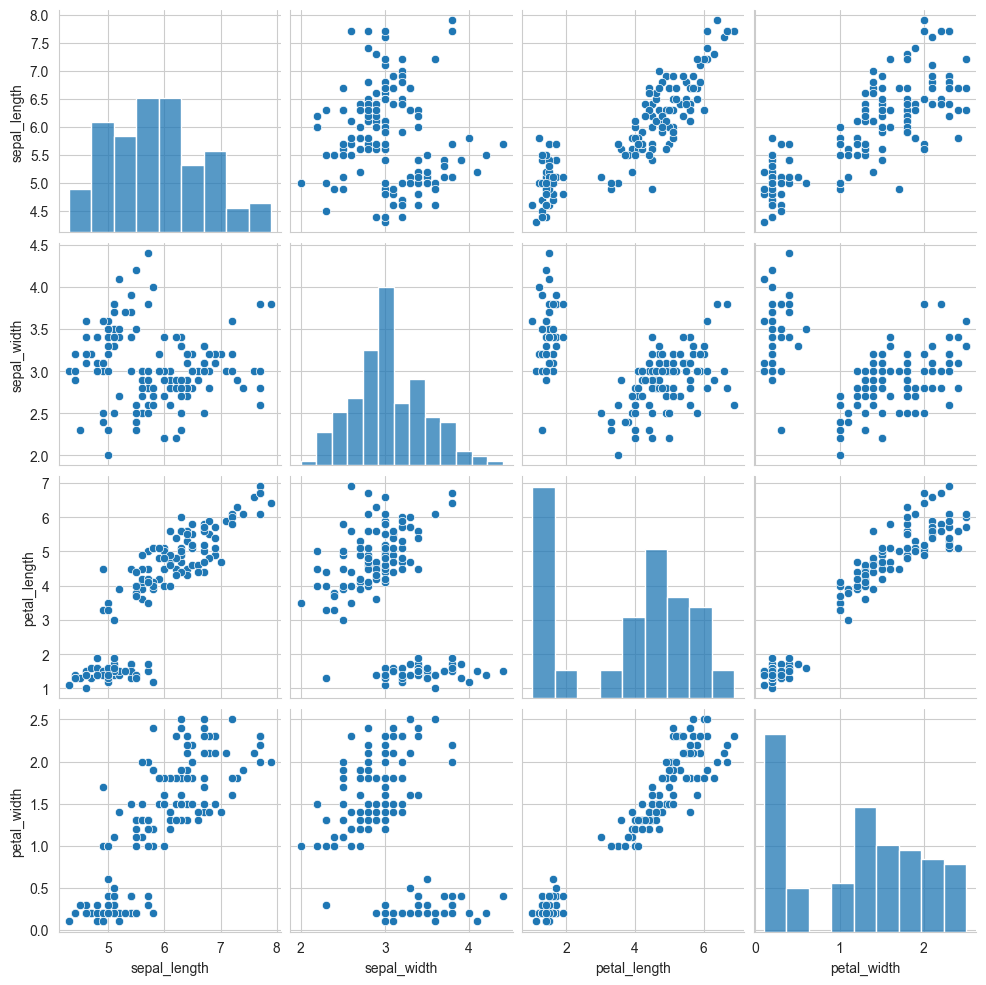

In [8]:
#Use the `sns.pairplot()` to create a pairplot of the iris dataset.
sns.pairplot(iris)
plt.show()


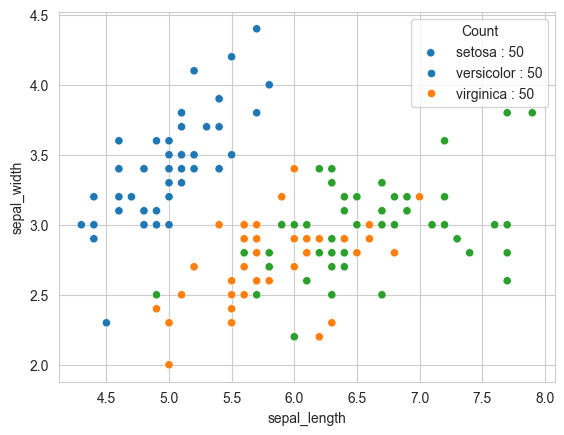

In [9]:
#Create a scatterplot of the same (or different) pair of variables. 
#Add a second legend which will show the number of datapoints in each category.
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
counts = iris['species'].value_counts()
legend_labels = [f'{species} : {count}' for species, count in counts.items()]
plt.legend(title='Count', labels=legend_labels)
plt.show()

# 2. Creating insights from visualisations
## IMDB Data set

In [10]:
imdb=pd.read_csv('/Users/apple/Desktop/amsterdam_tech/m5w2/imdb.csv')
imdb.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [11]:
imdb.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: Unnamed: 0, Length: 1000, dtype: int64

In [12]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Certificate  973 non-null    object 
 2   Duration     1000 non-null   object 
 3   Genre        1000 non-null   object 
 4   Rate         1000 non-null   float64
 5   Metascore    712 non-null    float64
 6   Description  1000 non-null   object 
 7   Cast         1000 non-null   object 
 8   Info         1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


In [13]:
#convert duration column to int
imdb['Duration']=imdb['Duration'].str.extract('(\d+)')
imdb['Duration']=imdb['Duration'].astype(int)
imdb.rename(columns={'Duration':'Duration(mins)'}, inplace=True)

In [16]:
# convert info to separate columns
imdb['Votes']=imdb['Info'].str.replace('Votes: ','').str.replace(',','')
imdb['Votes']=imdb['Votes'].str.extract('(\d+)')
imdb['Votes']=imdb['Votes'].astype(int)
imdb['Gross']=imdb['Info'].str.extract('(\$[0-9]+\.[0-9]+M)')
imdb['Gross']=imdb['Gross'].str.replace('$','').str.replace('M','')
imdb['Gross']=imdb['Gross'].astype(float)
imdb.rename(columns={'Gross':'Gross(millions)'}, inplace=True)
imdb.pop('Info')
imdb.head()


,Title,Certificate,Duration(mins),Genre,Rate,Metascore,Description,Cast,Votes,Gross(millions)
0,1. The Shawshank Redemption (1994),R,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...",2295987,28.34
1,2. The Godfather (1972),R,175,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,1584782,134.97
2,3. The Dark Knight (2008),PG-13,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,2260649,534.86
3,4. The Godfather: Part II (1974),R,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,1107253,57.30
4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...",1614369,377.85


In [17]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1000 non-null   object 
 1   Certificate      973 non-null    object 
 2   Duration(mins)   1000 non-null   int64  
 3   Genre            1000 non-null   object 
 4   Rate             1000 non-null   float64
 5   Metascore        712 non-null    float64
 6   Description      1000 non-null   object 
 7   Cast             1000 non-null   object 
 8   Votes            1000 non-null   int64  
 9   Gross(millions)  849 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


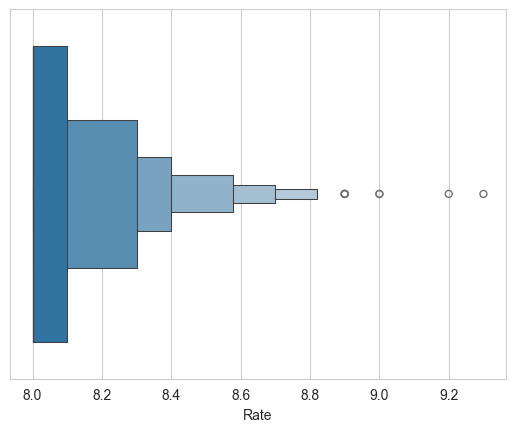

In [43]:
#Use Seaborn to create a set of exploratory visualizations that help you understand the structure and relationships in the data.
#Create a boxen of the IMDB rating
sns.boxenplot(data=imdb, x='Rate')
plt.show()

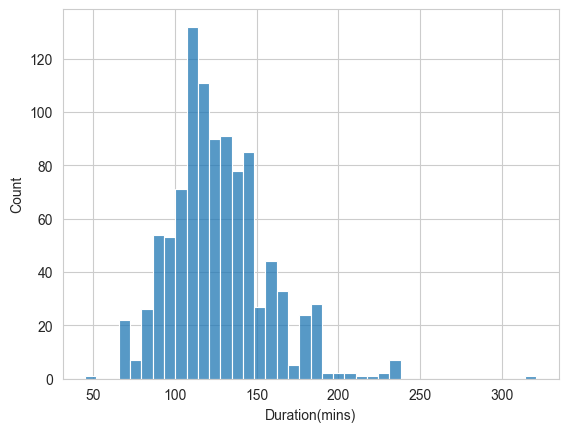

In [20]:
#Create a histogram of the duration
sns.histplot(data=imdb, x='Duration(mins)')
plt.show()

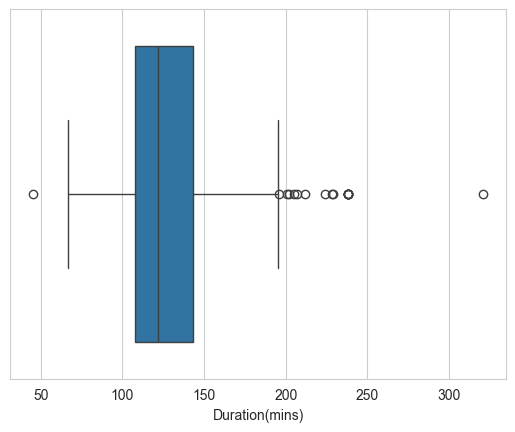

In [21]:
#create box plot of duration
sns.boxplot(data=imdb, x='Duration(mins)')
plt.show()

<Axes: >

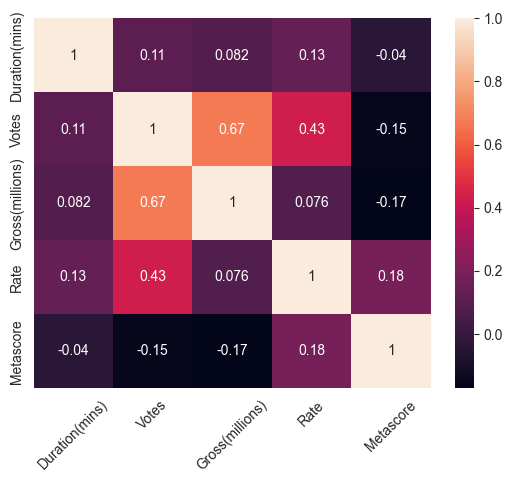

In [33]:
#Identify the top 3 factors that are most strongly correlated with a movie's IMDB rating.
#Create a scatterplot matrix of the top 3 factors
num_cols=['Duration(mins)', 'Votes', 'Gross(millions)','Rate','Metascore']
num_imdb=imdb[num_cols]
imdb_corr=num_imdb.corr()
plt.xticks(rotation=45)
sns.heatmap(imdb_corr,annot=True,fmt='0.2g')


## Identify the top 3 factors that are most strongly correlated with a movie's IMDB rating

There are total 5 numerical variables and there is a correlation between IMDB rating and votes
Other than that, there is a week correlation between IMDB rating and metascore and also rate and duration minutes. Since these values are very insiginificant, I deciced to do analysis on variables that are more correlated such as gross(millions) and votes

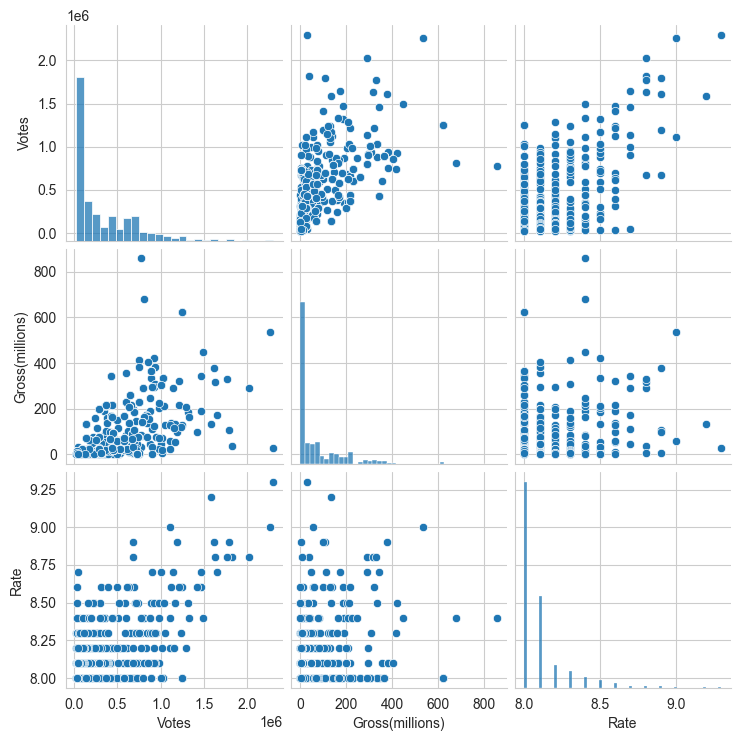

In [23]:
sns.pairplot(num_imdb[['Votes', 'Gross(millions)','Rate']])
plt.show()

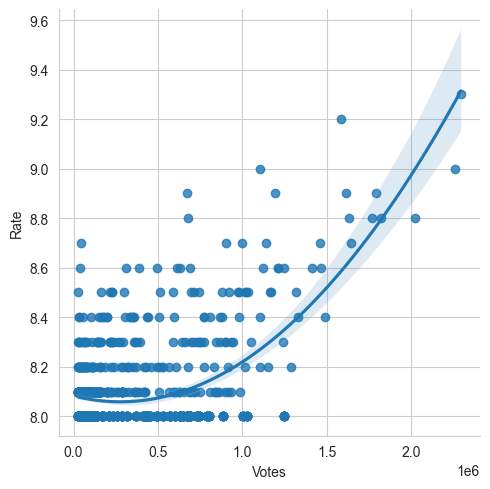

In [24]:
sns.lmplot(x='Votes', y='Rate', data=imdb,scatter=True,order=2)
plt.show()

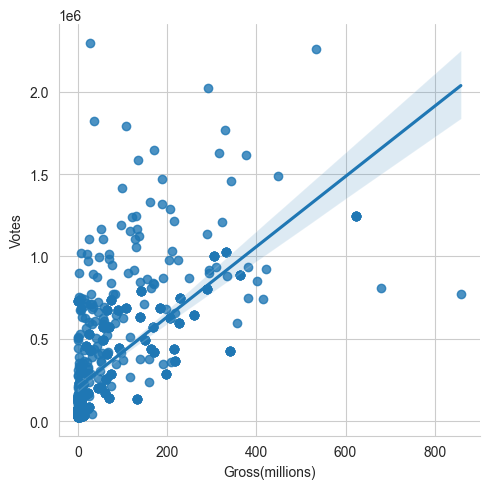

In [25]:
sns.lmplot(x='Gross(millions)', y='Votes', data=imdb,scatter=True,order=1)
plt.show()

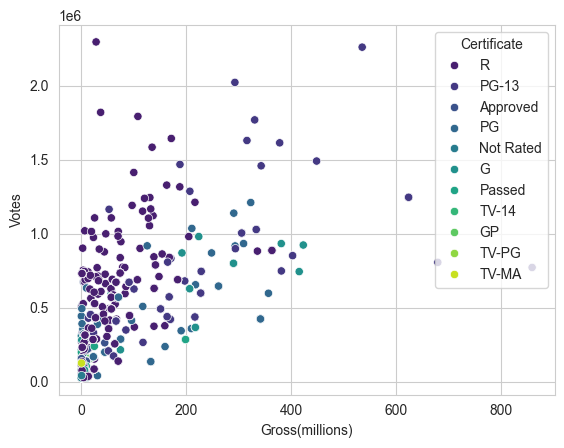

In [26]:
sns.scatterplot(x='Gross(millions)', y='Votes', data=imdb,hue='Certificate',palette='viridis')
plt.show()

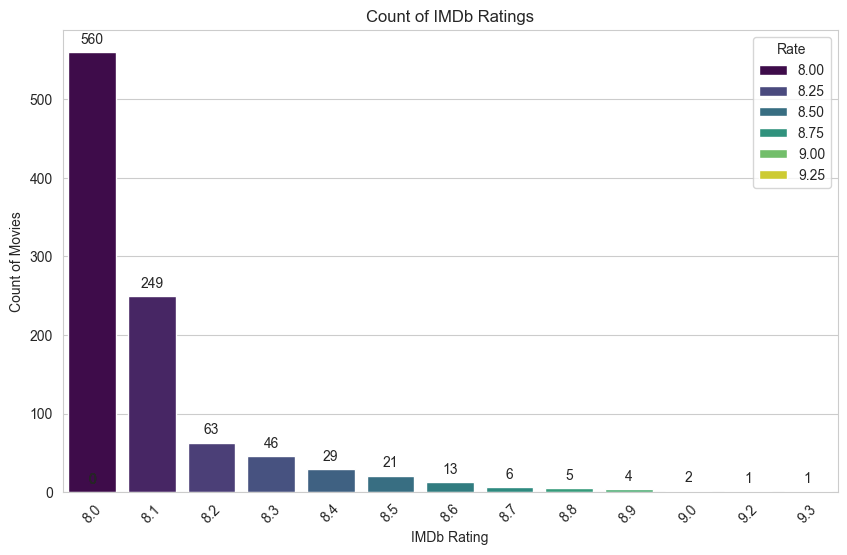

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rate', data=imdb, palette='viridis', hue='Rate')

plt.title('Count of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count of Movies')

plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()